## Passo 1

O primeiro passo é a análise da consistência dos dados. Utilize a biblioteca do Pandas para subir a base de dados e realizar validações sobre os dados, tais como a verificação de valores nulos, duplicados, identificação de outliers e realizar tratativas caso seja necessário. Não se esqueça de explicar cada etapa de transformação aplicada aos dados caso seja necessário.

Após realizar a tratativa dos dados, é necessário namorar os dados e caprichar na análise estatística descritiva, como por exemplo entender a média das variáveis qualitativas, entre outras.

In [25]:
import pandas as pd
import numpy as np

In [26]:
data = pd.read_csv('HR_Abandono.csv', sep=';')

In [27]:
data.head()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,"0,38","0,53",157,3,0,1,0,low,2,sales
1,2,"0,8","0,86",262,6,0,1,0,medium,5,sales
2,3,"0,11","0,88",272,4,0,1,0,medium,6,sales
3,4,"0,72","0,87",223,5,0,1,0,low,5,sales
4,5,"0,37","0,52",159,3,0,1,0,low,2,sales


In [28]:
data.shape

(14999, 11)

In [29]:
data.describe()

,id,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,num_project
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,201.083672,3.407027,0.144610,0.238083,0.021268,3.785986
std,4329.982679,50.182121,1.176120,0.351719,0.425924,0.144281,1.194539
min,1.000000,96.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,3750.500000,156.000000,3.000000,0.000000,0.000000,0.000000,3.000000
50%,7500.000000,200.000000,3.000000,0.000000,0.000000,0.000000,4.000000
75%,11249.500000,245.000000,4.000000,0.000000,0.000000,0.000000,5.000000
max,14999.000000,810.000000,6.000000,1.000000,1.000000,1.000000,6.000000


In [30]:
data.info() # não possui valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     14999 non-null  int64 
 1   satisfaction_level     14999 non-null  object
 2   last_evaluation        14999 non-null  object
 3   average_montly_hours   14999 non-null  int64 
 4   time_spend_company     14999 non-null  int64 
 5   Work_accident          14999 non-null  int64 
 6   left                   14999 non-null  int64 
 7   promotion_last_5years  14999 non-null  int64 
 8   salary                 14999 non-null  object
 9   num_project            14999 non-null  int64 
 10  depto                  14999 non-null  object
dtypes: int64(7), object(4)
memory usage: 1.3+ MB


In [31]:
data['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [32]:
data['depto'].value_counts()

depto
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

### Verificando dados duplicados

In [33]:
# verificando dados duplicados
data.duplicated().sum()

np.int64(0)

### Verificando outliers

In [34]:
# verificando existencia de outliers
import matplotlib.pyplot as plt

data.boxplot()

<Axes: >

In [35]:
data

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,"0,38","0,53",157,3,0,1,0,low,2,sales
1,2,"0,8","0,86",262,6,0,1,0,medium,5,sales
2,3,"0,11","0,88",272,4,0,1,0,medium,6,sales
3,4,"0,72","0,87",223,5,0,1,0,low,5,sales
4,5,"0,37","0,52",159,3,0,1,0,low,2,sales
...,...,...,...,...,...,...,...,...,...,...,...
14994,14995,"0,4","0,57",151,3,0,1,0,low,2,support
14995,14996,"0,37","0,48",160,3,0,1,0,low,2,support
14996,14997,"0,37","0,53",143,3,0,1,0,low,2,support
14997,14998,"0,11","0,96",280,4,0,1,0,low,6,support


In [36]:
# Tratando os dados que estão como string na tabela para transformar em float

data['satisfaction_level'] = data['satisfaction_level'].str.replace(',', '.').astype(float)
data['last_evaluation'] = data['last_evaluation'].str.replace(',', '.').astype(float)

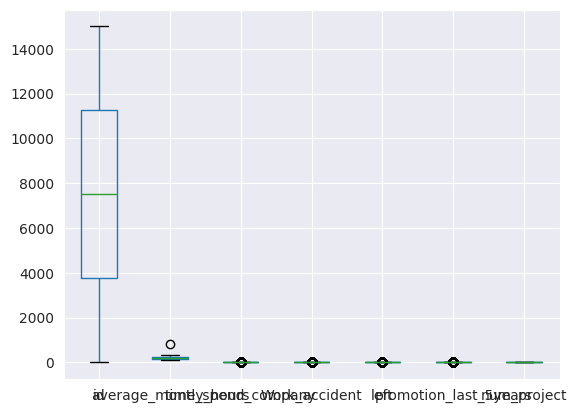

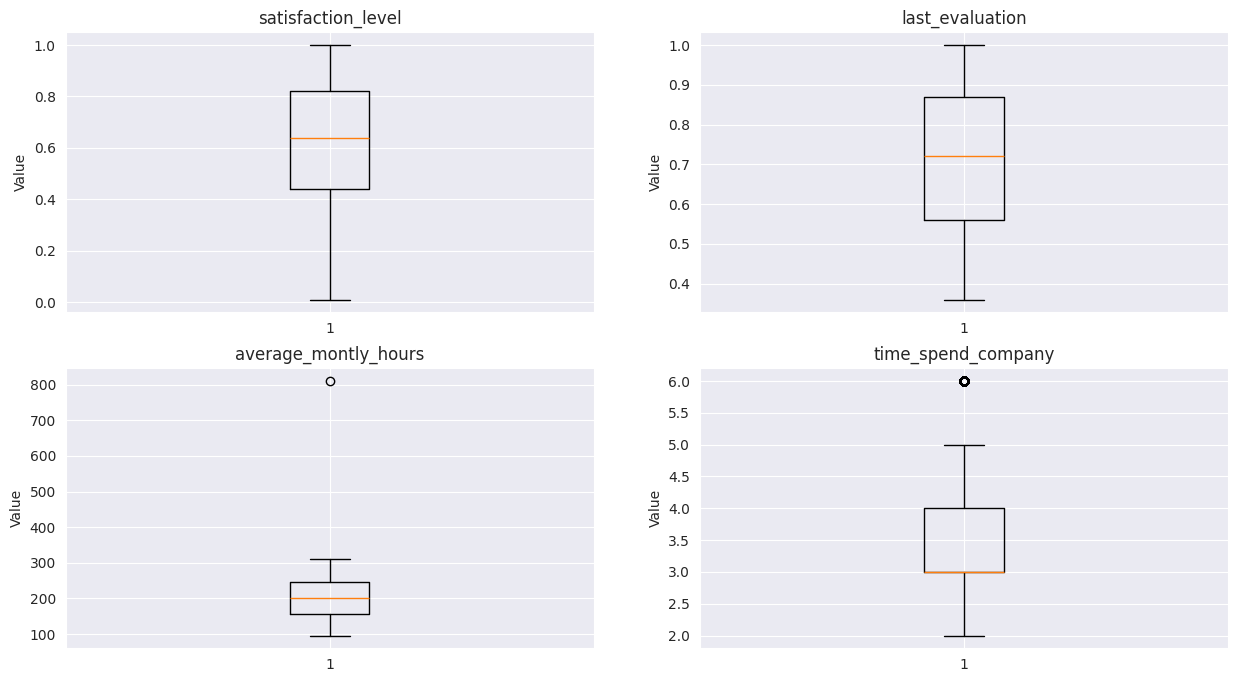

In [37]:
columns = ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']


plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.boxplot(data['satisfaction_level'])
plt.title('satisfaction_level')
plt.ylabel('Value')

plt.subplot(2, 2, 2)
plt.boxplot(data['last_evaluation'])
plt.title('last_evaluation')
plt.ylabel('Value')

plt.subplot(2, 2, 3)
plt.boxplot(data['average_montly_hours'])
plt.title('average_montly_hours')
plt.ylabel('Value')

plt.subplot(2, 2, 4)
plt.boxplot(data['time_spend_company'])
plt.title('time_spend_company')
plt.ylabel('Value')

plt.show()


average_montly_hours parece ter outlier bem fora do padrão

## Passo 2

Utilize a biblioteca do Matplotlib e Seaborn para realizar uma bela análise de dados com storytelling. Faça perguntas para os dados e conte uma história, utilizando gráficos e realizando inferências para explicar cada uma das análises. A dica aqui é não economizar no uso de gráficos!

In [38]:
import seaborn as sns

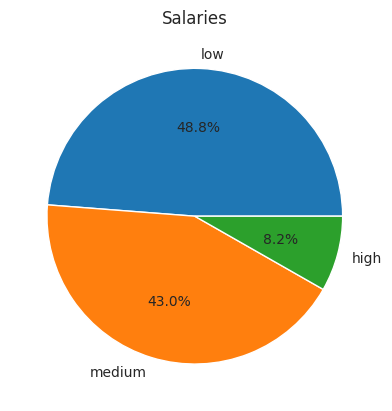

In [39]:
salaries = ['low', 'medium', 'high']
plt.pie(data['salary'].value_counts(), labels=salaries, autopct='%1.1f%%')
plt.title('Salaries')
plt.show()

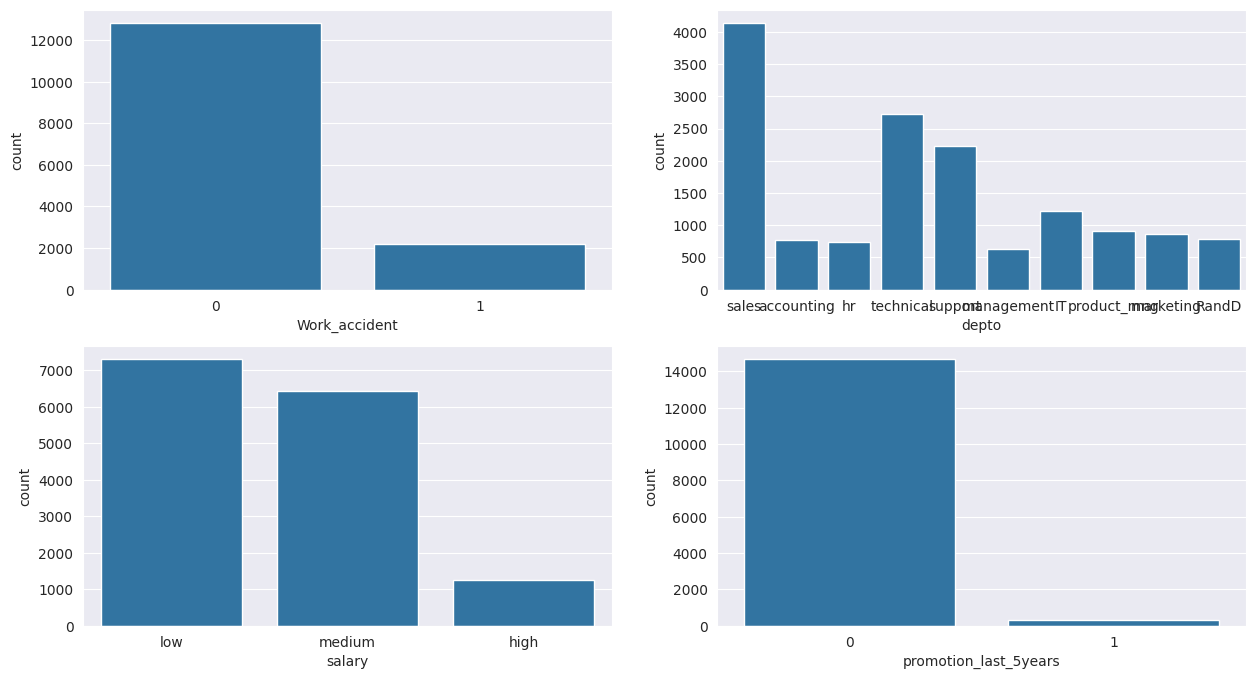

In [40]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='Work_accident', data=data)

plt.subplot(2, 2, 2)
sns.countplot(x='depto', data=data)

plt.subplot(2, 2, 3)
sns.countplot(x='salary', data=data)

plt.subplot(2, 2, 4)
sns.countplot(x='promotion_last_5years', data=data)

plt.show()


In [41]:
data

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,0.38,0.53,157,3,0,1,0,low,2,sales
1,2,0.80,0.86,262,6,0,1,0,medium,5,sales
2,3,0.11,0.88,272,4,0,1,0,medium,6,sales
3,4,0.72,0.87,223,5,0,1,0,low,5,sales
4,5,0.37,0.52,159,3,0,1,0,low,2,sales
...,...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,151,3,0,1,0,low,2,support
14995,14996,0.37,0.48,160,3,0,1,0,low,2,support
14996,14997,0.37,0.53,143,3,0,1,0,low,2,support
14997,14998,0.11,0.96,280,4,0,1,0,low,6,support


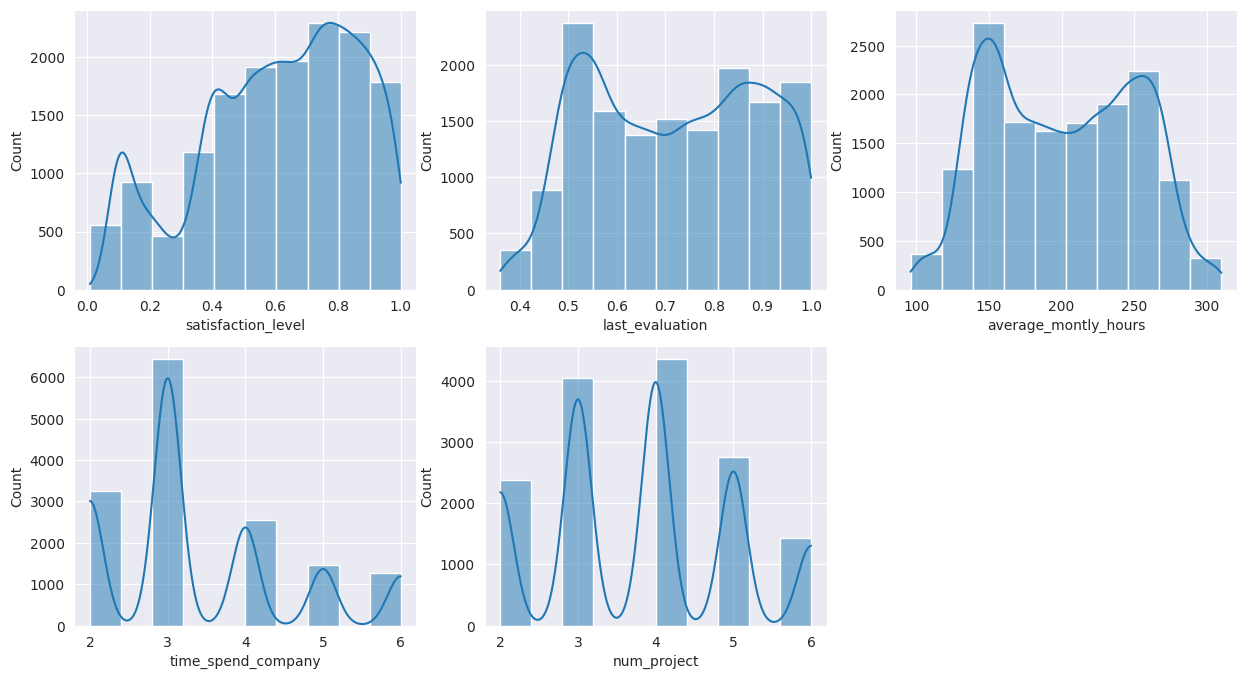

In [47]:

plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
sns.histplot(data['satisfaction_level'], bins=10, kde=True)

plt.subplot(2, 3, 2)    
sns.histplot(data['last_evaluation'], bins=10, kde=True)

plt.subplot(2, 3, 3)
sns.histplot(data['average_montly_hours'], bins=10, kde=True)

plt.subplot(2, 3, 4)
sns.histplot(data['time_spend_company'], bins=10, kde=True)

plt.subplot(2, 3, 5)
sns.histplot(data['num_project'], bins=10, kde=True)

plt.show()

In [43]:
# Removendo outliers da coluna average_montly_hours
q1 = data['average_montly_hours'].quantile(0.25)
q3 = data['average_montly_hours'].quantile(0.75)
iqr = q3 - q1
data = data[(data['average_montly_hours'] >= q1 - 1.5 * iqr) & (data['average_montly_hours'] <= q3 + 1.5 * iqr)]

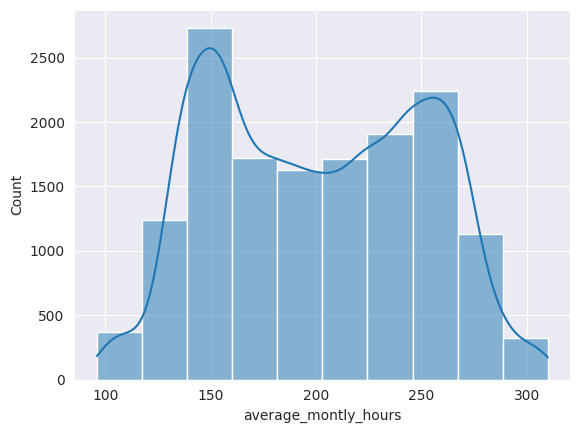

In [44]:
sns.histplot(data['average_montly_hours'], bins=10, kde=True)

plt.show()

In [45]:
data.shape # removido 1 outlier

(14998, 11)

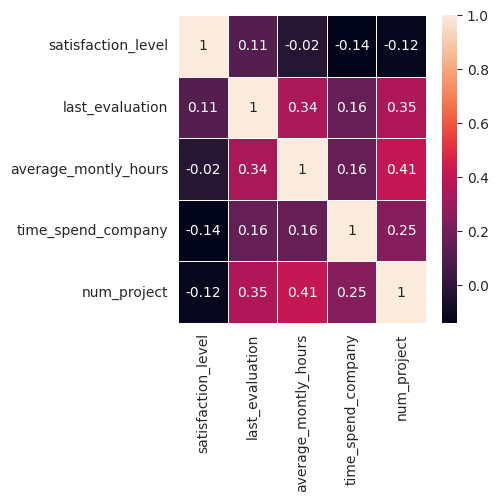

In [65]:
numeric_columns = ["satisfaction_level", "last_evaluation", "average_montly_hours", "time_spend_company", "num_project"]
numeric_data = data[numeric_columns]

correlation_matrix = numeric_data.corr().round(2)

fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

plt.show() # nada significativo

## Passo 3

Com base em suas análises exploratórias, formule uma hipótese estatística (aqui é importante definir claramente a afirmação que será testada), com o objetivo de comprovar se a hipótese será aceita ou não. Valide o teste e explique se a hipótese foi aceita.

SyntaxError: invalid syntax (1575142241.py, line 1)